### Data Evaluation Example
To see an example of the data that is logged by Mighty we provide this quick exammple.

Note: All data needed to get this example to run was done with the following command(s):<BR>
`python mighty/run_mighty.py 'algorithm=dqn' 'env=SigmoidBenchmark' 'num_steps=100000' 'seed=1` <BR>
for seeds from 1 to 5. The runs for data collection should take less than 10 minutes.

Import all needed functions to parse the data as pandas DataFrame

In [1]:
from mighty.utils.logger import load_logs  # We provide a loading function that transforms the data into a dict
import pandas as pd

/Users/andrebiedenkapp/opt/anaconda3/envs/mighty/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/andrebiedenkapp/opt/anaconda3/envs/mighty/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
exp_dir="/tmp/mighty_experiment_1"         # Set this to the directory from which you want to load the data
logs = load_logs(f"{exp_dir}/eval.jsonl")  # Either load eval.jsonl (for eval results) or (train.jsonl) for train results

df = pd.DataFrame.from_dict(logs)          # Turn the data into a DataFrame
df

,reward,action,next_state,state,done,step,episode,instance
0,0.695997,18,"[8.0, 1.813989485511224, -2.561208229221, 4.66...","[9.0, 1.813989485511224, -2.561208229221, 4.66...",False,1,99,"[2.521785920514681, 1.5093192958733685, 11.181..."
1,0.584772,18,"[7.0, 1.813989485511224, -2.561208229221, 4.66...","[8.0, 1.813989485511224, -2.561208229221, 4.66...",False,2,99,"[2.521785920514681, 1.5093192958733685, 11.181..."
2,0.277285,29,"[6.0, 1.813989485511224, -2.561208229221, 4.66...","[7.0, 1.813989485511224, -2.561208229221, 4.66...",False,3,99,"[2.521785920514681, 1.5093192958733685, 11.181..."
3,0.237639,29,"[5.0, 1.813989485511224, -2.561208229221, 4.66...","[6.0, 1.813989485511224, -2.561208229221, 4.66...",False,4,99,"[2.521785920514681, 1.5093192958733685, 11.181..."
4,0.200324,29,"[4.0, 1.813989485511224, -2.561208229221, 4.66...","[5.0, 1.813989485511224, -2.561208229221, 4.66...",False,5,99,"[2.521785920514681, 1.5093192958733685, 11.181..."
...,...,...,...,...,...,...,...,...
895,0.845056,5,"[4.0, 1.813989485511224, -2.561208229221, 4.66...","[5.0, 1.813989485511224, -2.561208229221, 4.66...",False,5,9999,"[2.521785920514681, 1.5093192958733685, 11.181..."
896,0.497926,16,"[3.0, 1.813989485511224, -2.561208229221, 4.66...","[4.0, 1.813989485511224, -2.561208229221, 4.66...",False,6,9999,"[2.521785920514681, 1.5093192958733685, 11.181..."
897,0.822848,4,"[2.0, 1.813989485511224, -2.561208229221, 4.66...","[3.0, 1.813989485511224, -2.561208229221, 4.66...",False,7,9999,"[2.521785920514681, 1.5093192958733685, 11.181..."
898,0.136405,36,"[1.0, 1.813989485511224, -2.561208229221, 4.66...","[2.0, 1.813989485511224, -2.561208229221, 4.66...",False,8,9999,"[2.521785920514681, 1.5093192958733685, 11.181..."


The log contains a per step record of what has happened, including individual state transitions and information about which context produced this data.

Thus, to get the episodic reward we need to first group it by episode.

In [3]:
df.groupby('episode')['reward'].sum()

episode
99      2.322707
199     6.593762
299     3.257365
399     4.903068
499     6.045274
          ...   
9599    8.283994
9699    6.709320
9799    7.804813
9899    8.191837
9999    5.875502
Name: reward, Length: 100, dtype: float64

### Plotting

In [4]:
import seaborn as sb
from matplotlib import pyplot as plt

sb.set_context('poster')
sb.set_style('darkgrid')

/Users/andrebiedenkapp/opt/anaconda3/envs/mighty/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/andrebiedenkapp/opt/anaconda3/envs/mighty/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


Text(0, 0.5, 'Reward')

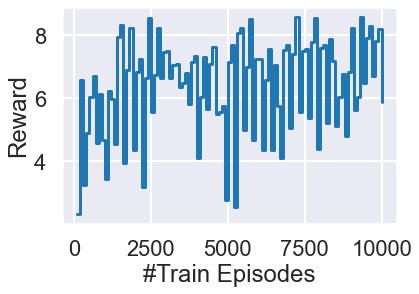

In [5]:
sum_group = df.groupby('episode')['reward'].sum()
x_values = sum_group.keys()
y_values = sum_group.values

plt.step(x_values, y_values, where='post')
plt.xlabel('#Train Episodes')
plt.ylabel('Reward')

<BR><BR><BR><BR><BR><BR><BR>

### Data evaluation with multiple runs

In [6]:
import numpy as np

In [7]:
seeds = list(range(1, 6))
steps = []
rewards = []

for seed in seeds:
    print(f'Loading data for seed {seed}')
    exp_dir=f"/tmp/mighty_experiment_{seed}"
    logs = load_logs(f"{exp_dir}/eval.jsonl")  # Either load eval.jsonl (for eval results) or (train.jsonl) for train results

    df = pd.DataFrame.from_dict(logs)          # Turn the data into a DataFrame
    sum_group = df.groupby('episode')['reward'].sum()
    x_values = sum_group.keys()
    y_values = sum_group.values
    steps.append(x_values)
    rewards.append(y_values)

Loading data for seed 1
Loading data for seed 2
Loading data for seed 3
Loading data for seed 4
Loading data for seed 5


Text(0, 0.5, 'Reward')

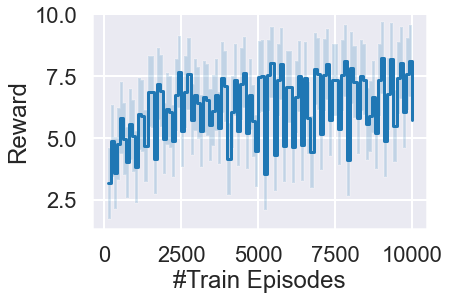

In [8]:
steps = np.array(steps)
rewards = np.array(rewards)

steps_r = steps.mean(axis=0)
mean_r = rewards.mean(axis=0)

plt.step(steps_r, mean_r, where='post')
plt.fill_between(steps_r, mean_r+rewards.std(), mean_r-rewards.std(), step='post', alpha=.2)
plt.xlabel('#Train Episodes')
plt.ylabel('Reward')